# Pratical example

## import the relevant libraries

In [84]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

## loading the raw data

In [85]:
raw_data = pd.read_csv('1.04. Real-life example.csv')

In [86]:
raw_data

Brand     Price       Body  Mileage  EngineV Engine Type  \
0               BMW   4200.00      sedan      277     2.00      Petrol   
1     Mercedes-Benz   7900.00        van      427     2.90      Diesel   
2     Mercedes-Benz  13300.00      sedan      358     5.00         Gas   
3              Audi  23000.00  crossover      240     4.20      Petrol   
4            Toyota  18300.00  crossover      120     2.00      Petrol   
...             ...       ...        ...      ...      ...         ...   
4340  Mercedes-Benz 125000.00      sedan        9     3.00      Diesel   
4341            BMW   6500.00      sedan        1     3.50      Petrol   
4342            BMW   8000.00      sedan      194     2.00      Petrol   
4343         Toyota  14200.00      sedan       31      nan      Petrol   
4344     Volkswagen  13500.00        van      124     2.00      Diesel   

     Registration  Year              Model  
0             yes  1991                320  
1             yes  1999       Sprinter 212  
2             yes  2003              S 500  
3             yes  2007                 Q7  
4             yes  2011              Rav 4  
...           ...   ...                ...  
4340          yes  2014              S 350  
4341          yes  1999                535  
4342          yes  1985                520  
4343          yes  2014            Corolla  
4344          yes  2013  T5 (Transporter)   

[4345 rows x 9 columns]

## preprocessing

## Exploring the descriptive statistics of the variables

In [87]:
raw_data.describe(include='all')

Brand     Price   Body  Mileage  EngineV Engine Type  \
count         4345   4173.00   4345  4345.00  4195.00        4345   
unique           7       nan      6      nan      nan           4   
top     Volkswagen       nan  sedan      nan      nan      Diesel   
freq           936       nan   1649      nan      nan        2019   
mean           NaN  19418.75    NaN   161.24     2.79         NaN   
std            NaN  25584.24    NaN   105.71     5.07         NaN   
min            NaN    600.00    NaN     0.00     0.60         NaN   
25%            NaN   6999.00    NaN    86.00     1.80         NaN   
50%            NaN  11500.00    NaN   155.00     2.20         NaN   
75%            NaN  21700.00    NaN   230.00     3.00         NaN   
max            NaN 300000.00    NaN   980.00    99.99         NaN   

       Registration    Year    Model  
count          4345 4345.00     4345  
unique            2     nan      312  
top             yes     nan  E-Class  
freq           3947     nan      199  
mean            NaN 2006.55      NaN  
std             NaN    6.72      NaN  
min             NaN 1969.00      NaN  
25%             NaN 2003.00      NaN  
50%             NaN 2008.00      NaN  
75%             NaN 2012.00      NaN  
max             NaN 2016.00      NaN

**count: nous donne le nombre de valeur pour chaque colonne. On peut donc remarquer qu'il y'a des valeurs manquantes pour les colonnes Price et EngineV qui sont à moins de 4345 contraire aux autres colonnes.

**unique: Nous donne le nombre de valeurs unique par colonne, on peut remarquer par exemple qu'il y a 312 Model différents.

**top: Nous montre les catégories les plus présente( grand nombre d'occurrence   

**freq nous donne la fréquence d'apparition pour chaque catégories 

## Determining the variables of interest 

In [88]:
# axix 0 c'est les lignes
# axix 1 c'est pour les colonnes

# nous pouvons avoir les infos sur le modèle à partir de l'année de fabrication et du volume du moteur, nous allons donc
# supprimer la colonne Model 

data = raw_data.drop(['Model'], axis=1)

In [89]:
data.describe(include='all')

Brand     Price   Body  Mileage  EngineV Engine Type  \
count         4345   4173.00   4345  4345.00  4195.00        4345   
unique           7       nan      6      nan      nan           4   
top     Volkswagen       nan  sedan      nan      nan      Diesel   
freq           936       nan   1649      nan      nan        2019   
mean           NaN  19418.75    NaN   161.24     2.79         NaN   
std            NaN  25584.24    NaN   105.71     5.07         NaN   
min            NaN    600.00    NaN     0.00     0.60         NaN   
25%            NaN   6999.00    NaN    86.00     1.80         NaN   
50%            NaN  11500.00    NaN   155.00     2.20         NaN   
75%            NaN  21700.00    NaN   230.00     3.00         NaN   
max            NaN 300000.00    NaN   980.00    99.99         NaN   

       Registration    Year  
count          4345 4345.00  
unique            2     nan  
top             yes     nan  
freq           3947     nan  
mean            NaN 2006.55  
std             NaN    6.72  
min             NaN 1969.00  
25%             NaN 2003.00  
50%             NaN 2008.00  
75%             NaN 2012.00  
max             NaN 2016.00

## Dealing with missing variables 

In [90]:
 data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

#### Nombre de veleur manquantes par colonne
#### le résulat confirme notre commentaire sur le réultat de la méthode describe vue plus haut:
**count: nous donne le nombre de valeur pour chaque colonne. On peut donc remarquer qu'il y'a des valeurs manquantes pour les colonnes Price et EngineV qui sont à moins de 4345 contraire aux autres colonnes.

In [91]:
# Supprimons les valeurs manquantes: en outre, nous allons Supprimer toutes les lignes où 
# Price=null ou  EngineV==null 
data_no_mv = data.dropna(axis=0)

In [92]:
data_no_mv.describe(include='all')

Brand     Price   Body  Mileage  EngineV Engine Type  \
count         4025   4025.00   4025  4025.00  4025.00        4025   
unique           7       nan      6      nan      nan           4   
top     Volkswagen       nan  sedan      nan      nan      Diesel   
freq           880       nan   1534      nan      nan        1861   
mean           NaN  19552.31    NaN   163.57     2.76         NaN   
std            NaN  25815.73    NaN   103.39     4.94         NaN   
min            NaN    600.00    NaN     0.00     0.60         NaN   
25%            NaN   6999.00    NaN    90.00     1.80         NaN   
50%            NaN  11500.00    NaN   158.00     2.20         NaN   
75%            NaN  21900.00    NaN   230.00     3.00         NaN   
max            NaN 300000.00    NaN   980.00    99.99         NaN   

       Registration    Year  
count          4025 4025.00  
unique            2     nan  
top             yes     nan  
freq           3654     nan  
mean            NaN 2006.38  
std             NaN    6.70  
min             NaN 1969.00  
25%             NaN 2003.00  
50%             NaN 2007.00  
75%             NaN 2012.00  
max             NaN 2016.00

## Exploring the PDFs

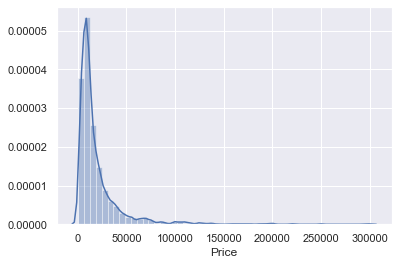

In [93]:
# nous imprime la distribution de probabilités de la feature 'Price'
sns.distplot(data_no_mv['Price'])

Nous recherchons une distribution normale du prix et la figure ci-dessous en est pas une.

## Dealing with outliers

In [94]:

q = data_no_mv['Price'].quantile(0.99)
data_1 = data_no_mv[data_no_mv['Price']<q]
data_1.describe(include='all')
q

129812.51999999981

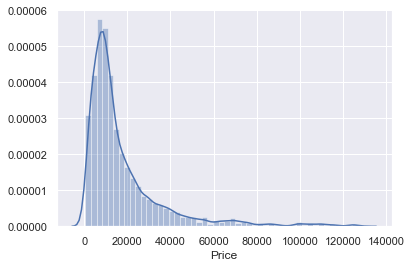

In [95]:
sns.distplot(data_1['Price']) #l les chose s'améliorent, mais c'est pas encore ça

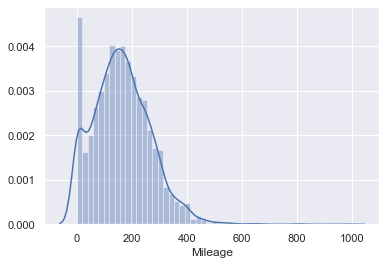

In [96]:
sns.distplot(data_no_mv['Mileage'])

In [97]:
q = data_no_mv['Mileage'].quantile(0.99)
data_2 = data_no_mv[data_no_mv['Mileage']<q]

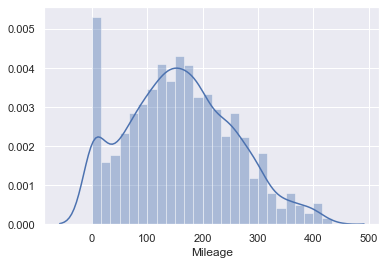

In [98]:
sns.distplot(data_2['Mileage'])

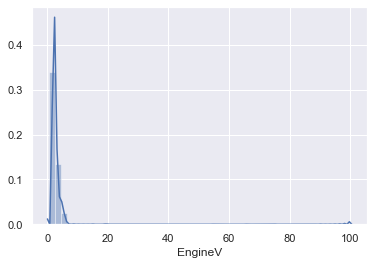

In [99]:
sns.distplot(data_no_mv['EngineV'])

In [100]:
data_3 = data_2[data_2['EngineV']<6.5]

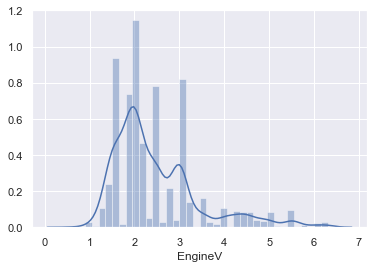

In [101]:
sns.distplot(data_3['EngineV'])

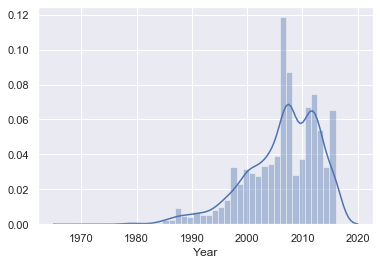

In [102]:
sns.distplot(data_no_mv['Year'])

In [103]:
q = data_no_mv['Year'].quantile(0.01)
data_4 = data_no_mv[data_no_mv['Year']>q]

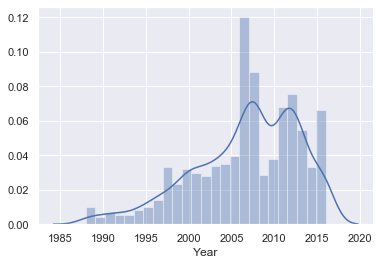

In [104]:
sns.distplot(data_4['Year'])

In [105]:
data_cleaned = data_4.reset_index(drop=True)

In [106]:
data_cleaned.describe(include='all')

Brand     Price   Body  Mileage  EngineV Engine Type  \
count         3969   3969.00   3969  3969.00  3969.00        3969   
unique           7       nan      6      nan      nan           4   
top     Volkswagen       nan  sedan      nan      nan      Diesel   
freq           866       nan   1500      nan      nan        1850   
mean           NaN  19782.12    NaN   162.74     2.78         NaN   
std            NaN  25918.54    NaN   102.93     4.97         NaN   
min            NaN    800.00    NaN     0.00     0.60         NaN   
25%            NaN   7170.00    NaN    90.00     1.80         NaN   
50%            NaN  11700.00    NaN   157.00     2.20         NaN   
75%            NaN  22000.00    NaN   230.00     3.00         NaN   
max            NaN 300000.00    NaN   980.00    99.99         NaN   

       Registration    Year  
count          3969 3969.00  
unique            2     nan  
top             yes     nan  
freq           3598     nan  
mean            NaN 2006.69  
std             NaN    6.20  
min             NaN 1988.00  
25%             NaN 2003.00  
50%             NaN 2008.00  
75%             NaN 2012.00  
max             NaN 2016.00

## Checking th OLS assumptions 

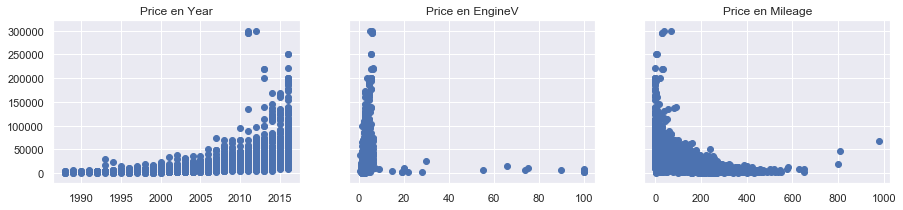

In [107]:
f,(ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Year'], data_cleaned['Price'])
ax1.set_title('Price en Year')
ax2.scatter(data_cleaned['EngineV'], data_cleaned['Price'])
ax2.set_title('Price en EngineV')
ax3.scatter(data_cleaned['Mileage'], data_cleaned['Price'])
ax3.set_title('Price en Mileage')

plt.show()

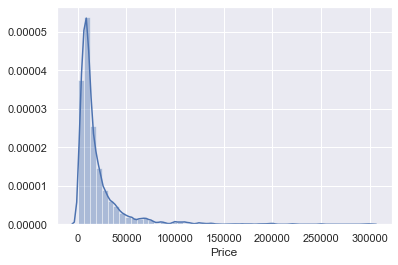

In [108]:
sns.distplot(data_cleaned['Price'])

Le prix n'est pas normalement distribué ce qui fait que ses relations avec les autres entités normalement distribuées ne sont pas linéares

### Relaxing the assumptions

In [109]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price
data_cleaned

Brand     Price       Body  Mileage  EngineV Engine Type  \
0               BMW   4200.00      sedan      277     2.00      Petrol   
1     Mercedes-Benz   7900.00        van      427     2.90      Diesel   
2     Mercedes-Benz  13300.00      sedan      358     5.00         Gas   
3              Audi  23000.00  crossover      240     4.20      Petrol   
4            Toyota  18300.00  crossover      120     2.00      Petrol   
...             ...       ...        ...      ...      ...         ...   
3964     Volkswagen  11500.00        van      163     2.50      Diesel   
3965         Toyota  17900.00      sedan       35     1.60      Petrol   
3966  Mercedes-Benz 125000.00      sedan        9     3.00      Diesel   
3967            BMW   6500.00      sedan        1     3.50      Petrol   
3968     Volkswagen  13500.00        van      124     2.00      Diesel   

     Registration  Year  log_price  
0             yes  1991       8.34  
1             yes  1999       8.97  
2             yes  2003       9.50  
3             yes  2007      10.04  
4             yes  2011       9.81  
...           ...   ...        ...  
3964          yes  2008       9.35  
3965          yes  2014       9.79  
3966          yes  2014      11.74  
3967          yes  1999       8.78  
3968          yes  2013       9.51  

[3969 rows x 9 columns]

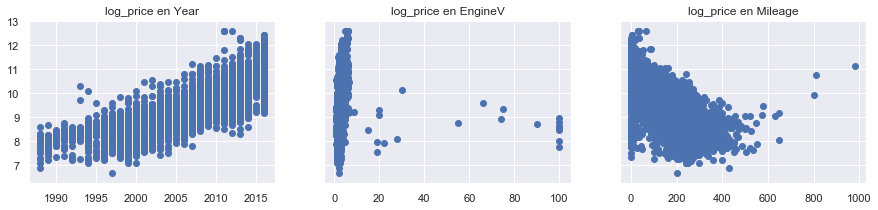

In [110]:
f,(ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Year'], data_cleaned['log_price'])
ax1.set_title('log_price en Year')
ax2.scatter(data_cleaned['EngineV'], data_cleaned['log_price'])
ax2.set_title('log_price en EngineV')
ax3.scatter(data_cleaned['Mileage'], data_cleaned['log_price'])
ax3.set_title('log_price en Mileage')

plt.show()

In [111]:
data_cleaned = data_cleaned.drop(['Price'], axis=1)

### Multicolilinearlity

In [112]:
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

In [113]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage', 'Year', 'EngineV']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['features'] = variables.columns

In [114]:
vif

VIF features
0 3.48  Mileage
1 3.74     Year
2 1.31  EngineV

VIF € [1, +inf)

VIF= 1: pas de multicollinéarité ( cest aussi la valeur minimum de de cette méssure)

Généralement 1 < VIF <5 est considéré comme correcte 

Certains sources affirment que VIF > 5 est inacceptable, d'autres 6, 10

Pour notre exemple, ils semble que qu'une année est définitivement trop corrélée aux autres variables, par conséquent, on ne supprimera que l'année.

In [115]:
data_no_multicollinearity = data_cleaned.drop(['Year'], axis=1)

## Create dummy variables

In [116]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True)

In [117]:
data_with_dummies.head()

Mileage  EngineV  log_price  Brand_BMW  Brand_Mercedes-Benz  \
0      277     2.00       8.34          1                    0   
1      427     2.90       8.97          0                    1   
2      358     5.00       9.50          0                    1   
3      240     4.20      10.04          0                    0   
4      120     2.00       9.81          0                    0   

   Brand_Mitsubishi  Brand_Renault  Brand_Toyota  Brand_Volkswagen  \
0                 0              0             0                 0   
1                 0              0             0                 0   
2                 0              0             0                 0   
3                 0              0             0                 0   
4                 0              0             1                 0   

   Body_hatch  Body_other  Body_sedan  Body_vagon  Body_van  Engine Type_Gas  \
0           0           0           1           0         0                0   
1           0           0           0           0         1                0   
2           0           0           1           0         0                1   
3           0           0           0           0         0                0   
4           0           0           0           0         0                0   

   Engine Type_Other  Engine Type_Petrol  Registration_yes  
0                  0                   1                 1  
1                  0                   0                 1  
2                  0                   0                 1  
3                  0                   1                 1  
4                  0                   1                 1

## Rearrange a bit

In [118]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [119]:
cols = ['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [120]:
cols

['Mileage',
 'EngineV',
 'log_price',
 'Brand_BMW',
 'Brand_Mercedes-Benz',
 'Brand_Mitsubishi',
 'Brand_Renault',
 'Brand_Toyota',
 'Brand_Volkswagen',
 'Body_hatch',
 'Body_other',
 'Body_sedan',
 'Body_vagon',
 'Body_van',
 'Engine Type_Gas',
 'Engine Type_Other',
 'Engine Type_Petrol',
 'Registration_yes']

In [121]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

Mileage  EngineV  log_price  Brand_BMW  Brand_Mercedes-Benz  \
0      277     2.00       8.34          1                    0   
1      427     2.90       8.97          0                    1   
2      358     5.00       9.50          0                    1   
3      240     4.20      10.04          0                    0   
4      120     2.00       9.81          0                    0   

   Brand_Mitsubishi  Brand_Renault  Brand_Toyota  Brand_Volkswagen  \
0                 0              0             0                 0   
1                 0              0             0                 0   
2                 0              0             0                 0   
3                 0              0             0                 0   
4                 0              0             1                 0   

   Body_hatch  Body_other  Body_sedan  Body_vagon  Body_van  Engine Type_Gas  \
0           0           0           1           0         0                0   
1           0           0           0           0         1                0   
2           0           0           1           0         0                1   
3           0           0           0           0         0                0   
4           0           0           0           0         0                0   

   Engine Type_Other  Engine Type_Petrol  Registration_yes  
0                  0                   1                 1  
1                  0                   0                 1  
2                  0                   0                 1  
3                  0                   1                 1  
4                  0                   1                 1

## Linear regression model

#### Delcare the input and the targets

In [122]:
targets = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'], axis=1)

#### Scale the data

In [123]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [124]:
inputs_scaled = scaler.transform(inputs)

#### Train test split

In [125]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

#### Create the regression

In [126]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [127]:
y_hat = reg.predict(x_train)

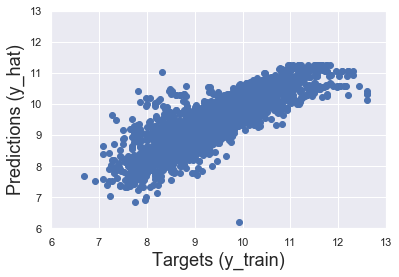

In [128]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)', size=18)
plt.ylabel('Predictions (y_hat)', size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

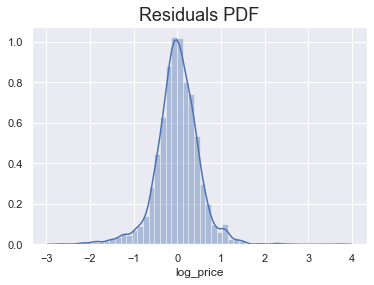

In [129]:
# PDF = Probability density function
# Selon les hypothèses de la régression linéaire, les erreurs doivent être normalement
# distribués avec une moyenne de 0
sns.distplot(y_train - y_hat)
plt.title("Residuals PDF", size=18)

In [130]:
reg.score(x_train, y_train)

0.7064135464223733

## Finding the weights and bias

In [131]:
reg.intercept_

9.429935379112756

In [49]:
reg.coef_

array([-0.46959176,  0.01517737,  0.02754735,  0.07350003, -0.17354107,
       -0.22251973, -0.06642924, -0.12859576, -0.22907017, -0.13916077,
       -0.29805079, -0.18606218, -0.2467679 , -0.10079439, -0.02888017,
       -0.10705484,  0.3220981 ])

In [50]:
reg_summary = pd.DataFrame(inputs.columns, columns=['features'])
reg_summary['weights'] = reg.coef_
reg_summary

features   weights
0               Mileage -0.469592
1               EngineV  0.015177
2             Brand_BMW  0.027547
3   Brand_Mercedes-Benz  0.073500
4      Brand_Mitsubishi -0.173541
5         Brand_Renault -0.222520
6          Brand_Toyota -0.066429
7      Brand_Volkswagen -0.128596
8            Body_hatch -0.229070
9            Body_other -0.139161
10           Body_sedan -0.298051
11           Body_vagon -0.186062
12             Body_van -0.246768
13      Engine Type_Gas -0.100794
14    Engine Type_Other -0.028880
15   Engine Type_Petrol -0.107055
16     Registration_yes  0.322098

In [51]:
data_cleaned['Brand'].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

La amrque Audi a été supprimer de la lsite, par conséquence, chaque fois que les autres Brand_... seront null, Audi  sera à 1. Donc Audi est la référence. 

Toutes les voitures qui ont un coefficient positif seront plus chères qu'une Audi

Toutes les voitures qui ont un coefficient negatif seront moins Chères qu'une Audi

## Testing

In [54]:
y_hat_test = reg.predict(x_test)

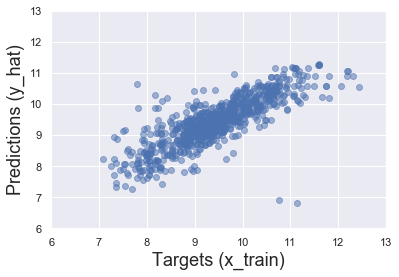

In [56]:
# alpha €[0, 1], montre l'opacité proportionnelle des points, 1 étant la valeur par défaut
plt.scatter(y_test, y_hat_test, alpha=0.5)
plt.xlabel('Targets (x_train)', size=18)
plt.ylabel('Predictions (y_hat)', size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [60]:
data_framePer = pd.DataFrame(y_hat_test, columns=["Predictions"])
data_framePer

Predictions
0       8.944748
1       8.177914
2       9.440715
3       8.722430
4      10.177670
..           ...
789     8.469552
790     9.040567
791     9.681749
792     9.310182
793     8.824588

[794 rows x 1 columns]

Nous voulons les prix et non leur logarithmes car le log est l'opposé de exponentielle

In [61]:
data_framePer = pd.DataFrame(np.exp(y_hat_test), columns=["Predictions"])
data_framePer

Predictions
0     7667.516073
1     3561.417082
2    12590.712853
3     6139.080855
4    26309.107374
..            ...
789   4767.378808
790   8438.560083
791  16022.491783
792  11049.959603
793   6799.386725

[794 rows x 1 columns]

In [63]:
data_framePer['Targets'] = np.exp(y_test)
data_framePer

Predictions  Targets
0     7667.516073      NaN
1     3561.417082   7900.0
2    12590.712853      NaN
3     6139.080855      NaN
4    26309.107374      NaN
..            ...      ...
789   4767.378808  28700.0
790   8438.560083      NaN
791  16022.491783      NaN
792  11049.959603      NaN
793   6799.386725      NaN

[794 rows x 2 columns]

In [64]:
# constat: La présence des valeurs nulles vient du fait que pandas essaye de matché les index qui sont differents
y_test

166      9.220291
3465     8.216088
475      9.472705
3803     9.200290
2695    10.264652
          ...    
2450     7.575585
2889     9.384294
876      9.615739
3047     9.104869
2600     8.433594
Name: log_price, Length: 794, dtype: float64

In [65]:
# pour résoudre le problème est de resetter les index de y_test
y_test = y_test.reset_index(drop=True)

In [66]:
data_framePer['Targets'] = np.exp(y_test)
data_framePer

Predictions  Targets
0     7667.516073  10100.0
1     3561.417082   3700.0
2    12590.712853  13000.0
3     6139.080855   9900.0
4    26309.107374  28700.0
..            ...      ...
789   4767.378808   1950.0
790   8438.560083  11900.0
791  16022.491783  14999.0
792  11049.959603   8999.0
793   6799.386725   4599.0

[794 rows x 2 columns]

In [68]:
# Calcul de la difference entre la valeur prédit et la cible
data_framePer['Residual'] = data_framePer['Targets'] - data_framePer['Predictions']

In [70]:
data_framePer['Differences%'] = np.abs(data_framePer['Residual'] / data_framePer['Targets']*100)
data_framePer

Predictions  Targets     Residual  Differences%
0     7667.516073  10100.0  2432.483927     24.083999
1     3561.417082   3700.0   138.582918      3.745484
2    12590.712853  13000.0   409.287147      3.148363
3     6139.080855   9900.0  3760.919145     37.989082
4    26309.107374  28700.0  2390.892626      8.330636
..            ...      ...          ...           ...
789   4767.378808   1950.0 -2817.378808    144.480965
790   8438.560083  11900.0  3461.439917     29.087730
791  16022.491783  14999.0 -1023.491783      6.823733
792  11049.959603   8999.0 -2050.959603     22.790972
793   6799.386725   4599.0 -2200.386725     47.844895

[794 rows x 4 columns]

Pour évalué les performances globales du modèle, nous pouvons imprimer les statistiques descriptives du bloc de données

In [71]:
data_framePer.describe()

Predictions        Targets       Residual  Differences%
count    794.000000     794.000000     794.000000    794.000000
mean   16490.066766   19851.744723    3361.677957     44.533467
std    13445.706194   25336.112514   18133.447624     85.206689
min      891.321980    1200.000000  -39887.218259      0.108023
25%     7879.101970    7000.000000   -2530.236498     13.493257
50%    12471.465564   11999.500000     275.048187     26.833364
75%    21110.957272   22675.000000    4126.351582     48.302783
max    78103.110113  250000.000000  211675.008137   1633.352737

In [77]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '%.2f' % x )
data_framePer.sort_values(by='Differences%')

Predictions   Targets  Residual  Differences%
668     21523.22  21500.00    -23.22          0.11
74       4293.27   4299.00      5.73          0.13
29      16618.83  16672.50     53.67          0.32
552      7225.39   7200.00    -25.39          0.35
779     11345.50  11300.00    -45.50          0.40
637      9840.02   9800.00    -40.02          0.41
690     30930.19  30800.00   -130.19          0.42
167     14679.46  14600.00    -79.46          0.54
665      6045.17   6000.00    -45.17          0.75
433     40193.33  40500.00    306.67          0.76
351     46543.73  46900.00    356.27          0.76
270      8813.69   8900.00     86.31          0.97
437      8586.11   8500.00    -86.11          1.01
495     11924.14  11800.00   -124.14          1.05
587      7587.48   7500.00    -87.48          1.17
203      1531.18   1550.00     18.82          1.21
454     11034.13  10900.00   -134.13          1.23
403      7090.91   7000.00    -90.91          1.30
483      4440.88   4500.00     59.12          1.31
625      6413.92   6500.00     86.08          1.32
280     18694.33  18950.00    255.67          1.35
115      6894.20   6800.00    -94.20          1.39
129     22357.94  22700.00    342.06          1.51
139     30429.02  30900.00    470.98          1.52
602     21743.57  21335.00   -408.57          1.92
244      2544.76   2600.00     55.24          2.12
281      6438.13   6300.00   -138.13          2.19
611     10016.11   9800.00   -216.11          2.21
120     13593.40  13900.00    306.60          2.21
766     11249.57  10999.00   -250.57          2.28
739      3419.97   3500.00     80.03          2.29
38      34083.69  34900.00    816.31          2.34
435      8515.92   8300.00   -215.92          2.60
250      7695.52   7500.00   -195.52          2.61
574     15092.02  15500.00    407.98          2.63
142      5965.86   5800.00   -165.86          2.86
778     69508.95  67500.00  -2008.95          2.98
93      17421.71  16900.00   -521.71          3.09
168     13081.98  13500.00    418.02          3.10
2       12590.71  13000.00    409.29          3.15
325     27789.80  28700.00    910.20          3.17
479     38563.31  39900.00   1336.69          3.35
680      6473.72   6700.00    226.28          3.38
651     22644.83  21900.00   -744.83          3.40
468     17261.14  17900.00    638.86          3.57
374     16660.90  17300.00    639.10          3.69
209      5187.13   5000.00   -187.13          3.74
1        3561.42   3700.00    138.58          3.75
160      3632.05   3500.00   -132.05          3.77
371     27408.41  28500.00   1091.59          3.83
666      9662.06   9300.00   -362.06          3.89
743     11843.87  11400.00   -443.87          3.89
672     52913.79  50900.00  -2013.79          3.96
113      8837.91   8500.00   -337.91          3.98
161     16681.07  17394.09    713.02          4.10
774      6227.64   6500.00    272.36          4.19
36      11985.95  11500.00   -485.95          4.23
240      6799.07   7100.00    300.93          4.24
92       5745.23   6000.00    254.77          4.25
623     17713.61  18500.00    786.39          4.25
392      9594.41   9200.00   -394.41          4.29
622     12154.42  12700.00    545.58          4.30
573     11956.34  12500.00    543.66          4.35
609      9083.90   9500.00    416.10          4.38
286     36787.47  38500.00   1712.53          4.45
288     69508.95  66500.00  -3008.95          4.52
197     19868.59  18999.00   -869.59          4.58
159     12308.31  12900.00    591.69          4.59
143      8742.56   8350.00   -392.56          4.70
369     69826.84  66666.00  -3160.84          4.74
523     23783.81  22700.00  -1083.81          4.77
759     13096.95  12500.00   -596.95          4.78
399      4748.28   4999.00    250.72          5.02
772     11394.82  12000.00    605.18          5.04
471      6924.62   7300.00    375.38          5.14
692      7489.60   7899.00    409.40          5.18
413     19361.95  18400.00   -961.95          5.23
166      3032.37   3200.00 

La présence des écarts trop grand peut être expliquer par le fait qu'il manque un facteur important, c'est peut-être la colonne modèle que nous avons supprimer au debut du note book.

## Il existe differentes façons d'améliorer un modèle:

- On peux soir supprimer certains facteurs aberrants 
- Utiliser differents types de transformations 